Mount drive for Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
knockdown_001.png  knockdown_029.png  knockdown_068.png  knockdown_106.png  knockdown_145.png
knockdown_002.png  knockdown_031.png  knockdown_069.png  knockdown_107.png  knockdown_146.png
knockdown_003.png  knockdown_032.png  knockdown_070.png  knockdown_108.png  knockdown_148.png
knockdown_004.png  knockdown_033.png  knockdown_071.png  knockdown_112.png  knockdown_149.png
knockdown_005.png  knockdown_034.png  knockdown_072.png  knockdown_114.png  knockdown_152.png
knockdown_006.png  knockdown_035.png  knockdown_073.png  knockdown_115.png  knockdown_153.png
knockdown_007.png  knockdown_038.png  knockdown_076.png  knockdown_116.png  knockdown_157.png
knockdown_008.png  knockdown_040.png  knockdown_077.png  knockdown_117.png  knockdown_158.png
knockdown_009.png  knockdown_043.png  knockdown_078.png  knockdown_120.png  knockdown_159.png
knockdown_010.png  knockdown_044.png  knockdown_079.png  knockdown_121.png  knockdown_160.png
knockdown_011.png  knockdown_049.p

Check dataset directory

In [ ]:
!ls /content/drive/MyDrive/fort/obj_train_data/images/train
!ls /content/drive/MyDrive/fort/obj_train_data/images/val
!ls /content/drive/MyDrive/fort/obj_train_data/images/test

!cat /content/drive/MyDrive/fort/obj_train_data/dataset.yaml

Clone YOLOv5

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


Install requirements

In [ ]:
!pip install -r requirements.txt

Train the model

In [ ]:
!python train.py --img 640 --batch 16 --epochs 60 --data /content/drive/MyDrive/fort/obj_train_data/dataset.yaml --weights yolov5s.pt

2024-06-17 04:03:12.207637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 04:03:12.207695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 04:03:12.317719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/fort/obj_train_data/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, devic

Save model weights

In [ ]:
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/fort/knockdown_model_weights.pt

Load YOLO model

In [ ]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/fort/knockdown_model_weights.pt')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-6-17 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Evaluate model

In [ ]:
!python val.py --weights /content/drive/MyDrive/fort/knockdown_model_weights.pt --data /content/drive/MyDrive/fort/obj_train_data/dataset.yaml --task test

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
val: data=/content/drive/MyDrive/fort/obj_train_data/dataset.yaml, weights=['/content/drive/MyDrive/fort/knockdown_model_weights.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-324-gbb27bf78 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/drive/MyDrive/fort/obj_train_data/labels/test... 18 images, 0 backgrounds, 0 corrupt: 100% 18/18 [00:22<00:00,  1.25s/it]
test: New cache created: /content/drive/MyDrive/fort/obj_train_data/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/1 [00:00

In [ ]:
results_base_dir = '/content/yolov5/runs/val/exp'
os.listdir(results_base_dir)

['PR_curve.png',
 'F1_curve.png',
 'P_curve.png',
 'val_batch0_labels.jpg',
 'confusion_matrix.png',
 'val_batch0_pred.jpg',
 'R_curve.png']

In [ ]:
import os
import random
import cv2
from IPython.display import display, Image
import matplotlib.pyplot as plt
import torch

test_images_dir = '/content/drive/MyDrive/fort/fortnite_data'

test_images = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith('.png') or img.endswith('.jpg')]

random_img_path = random.choice(test_images)
print(f"Selected image: {random_img_path}")

# Function to draw bounding boxes with confidence scores
def plot_one_box(x, img, color=None, label=None, line_thickness=3):
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv1.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

# Read the selected image
img = cv2.imread(random_img_path)

# Resize the image to 640x640
img_resized = cv2.resize(img, (640, 640))

# Load the trained YOLOv5 model
model_path = '/content/drive/MyDrive/fortnite_yolo/knockdown_model_weights.pt'
model = torch.hub.load('/content/yolov5', 'custom', path=model_path, source='local')

# Adjust model settings
model.conf = 0.1  # confidence threshold

# Run inference on the resized image
print("Running inference...")
results = model(img_resized)

# Print the results to see the output structure
print(results)
print(results.xyxy)

# Check if there are any detections
if results.xyxy[0].shape[0] > 0:
    # Extract the confidence scores
    confidences = results.xyxy[0][:, 4].cpu().numpy()
    print(f"Confidence scores: {confidences}")

    # Draw bounding boxes with confidence scores
    for *box, conf, cls in results.xyxy[0]:
        label = f'{model.names[int(cls)]} {conf:.2f}'
        plot_one_box(box, img_resized, label=label, color=(255, 0, 0), line_thickness=2)

    # Convert the image to RGB
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Save a temporary copy to display
    temp_img_path = random_img_path.replace('.png', '_conf_display.png').replace('.jpg', '_conf_display.jpg')
    cv2.imwrite(temp_img_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

    # Display the image
    display(Image(filename=temp_img_path))
else:
    print("No detections found in the image.")

# Also display the original resized image
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/fortnite_data'

Processing image: /content/yolov5/runs/val/exp/val_batch0_pred.jpg


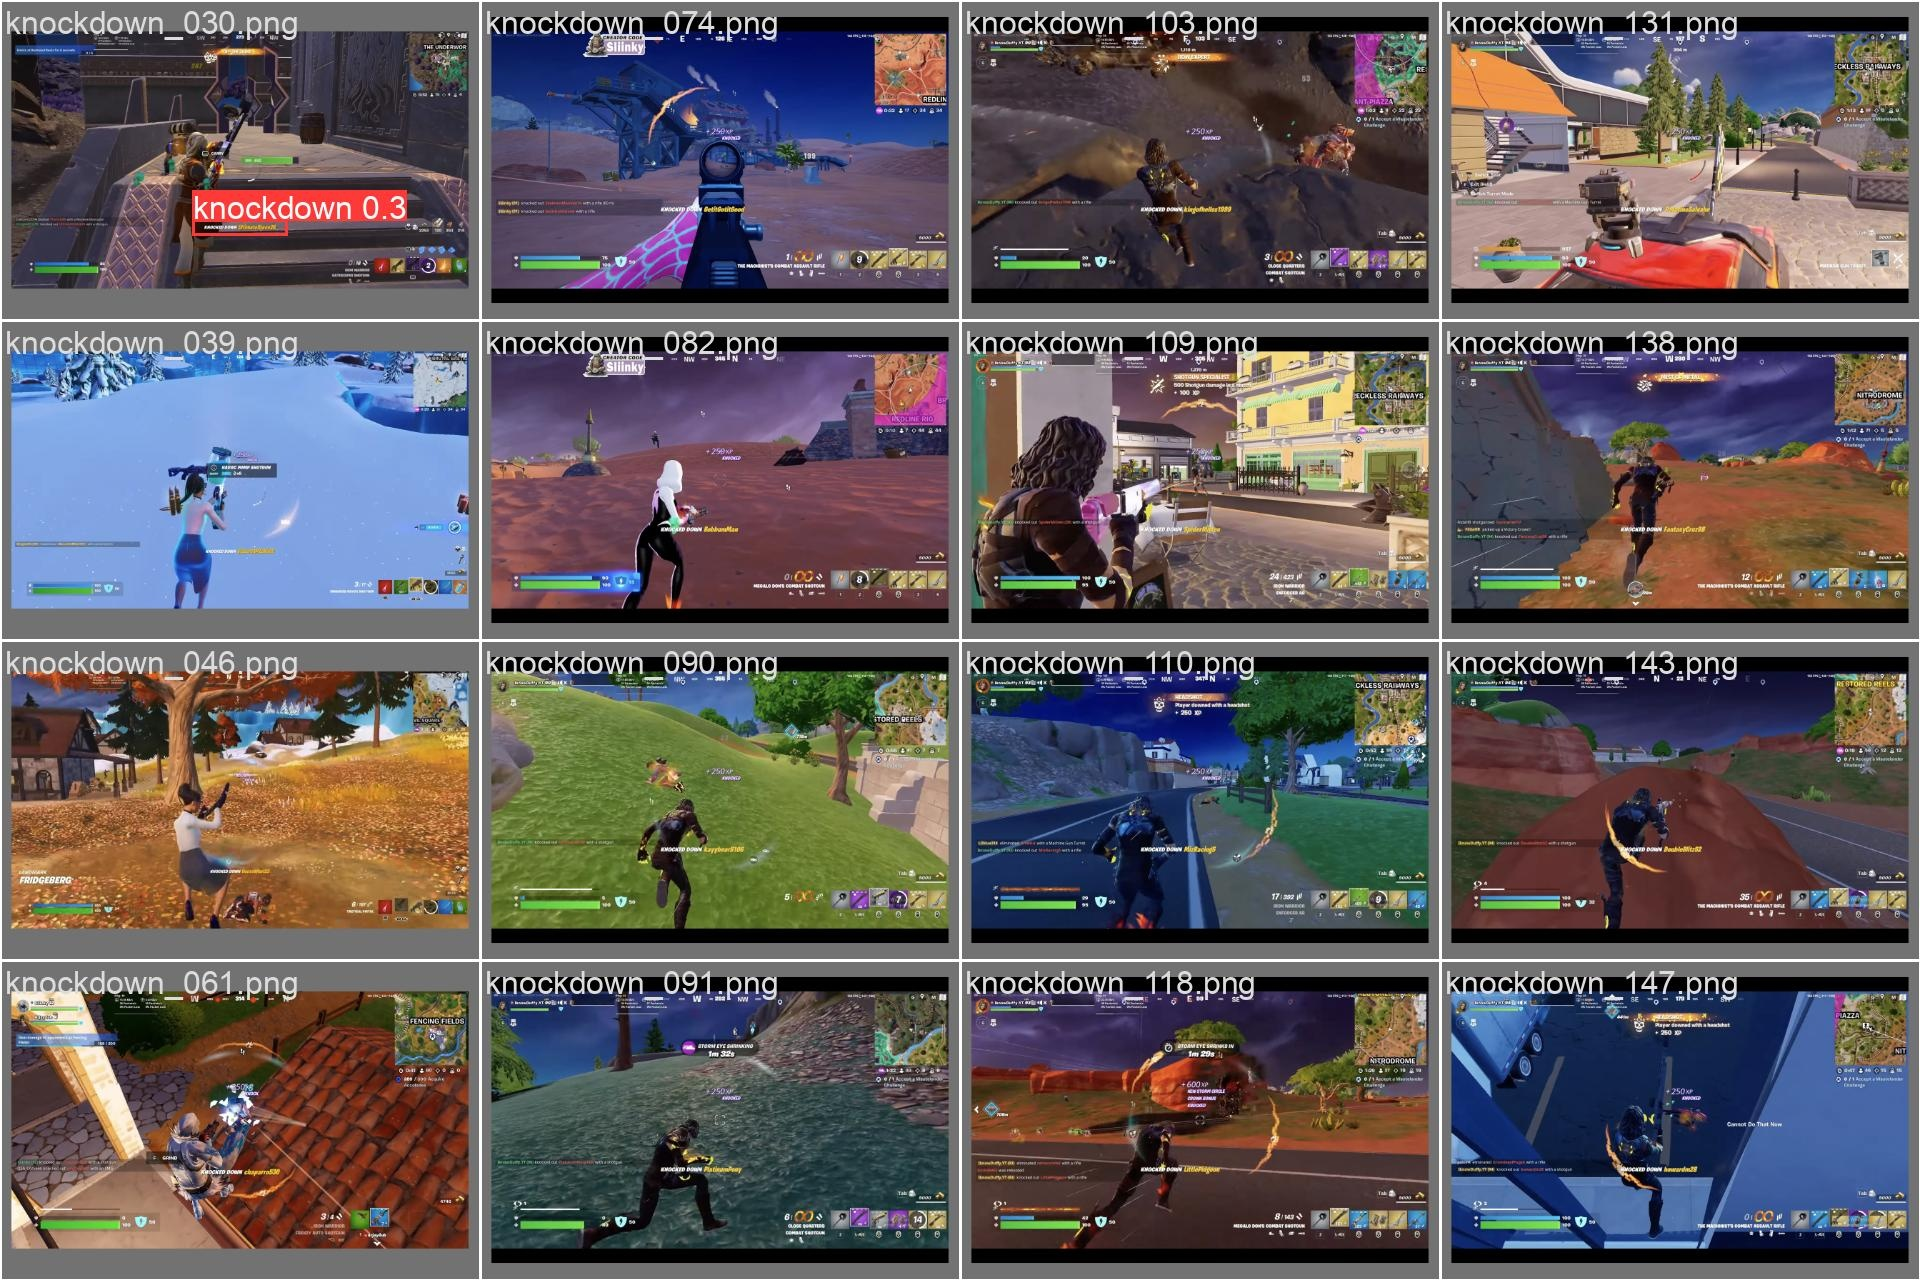

Processing image: /content/yolov5/runs/val/exp/val_batch0_labels.jpg


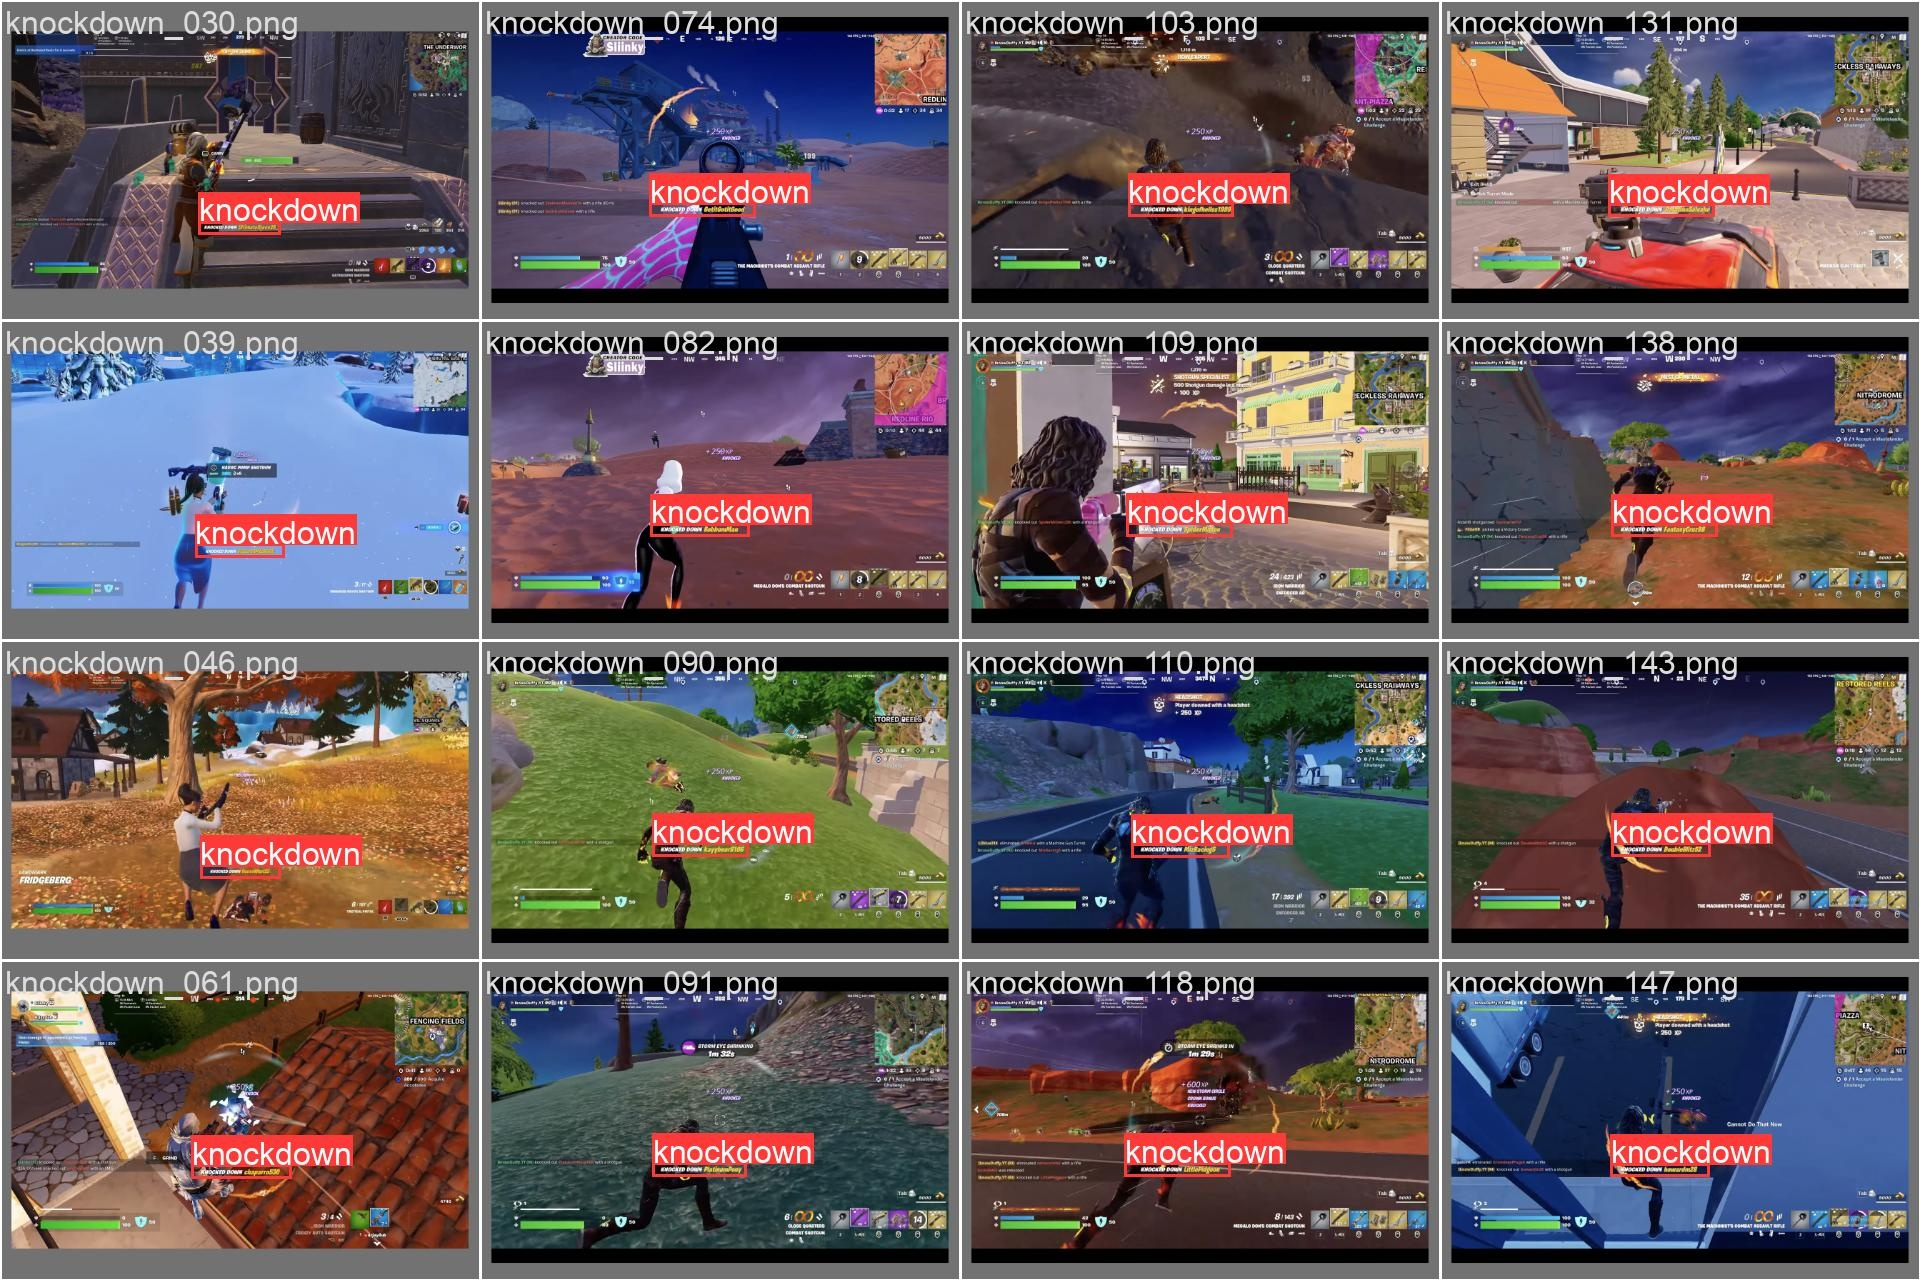

In [ ]:
import cv2
from matplotlib import pyplot as plt
import os
from IPython.display import display, Image

# Directory where the test results are saved
results_dir = '/content/yolov5/runs/val/exp'  # Correct directory based on your output

# List of specific result images that might contain predictions
result_images = ['val_batch0_pred.jpg', 'val_batch0_labels.jpg']

# Function to draw bounding boxes with confidence scores
def plot_one_box(x, img, color=None, label=None, line_thickness=3):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

# Display each result image
for img_name in result_images:
    img_path = os.path.join(results_dir, img_name)
    if os.path.exists(img_path):
        print(f"Processing image: {img_path}")  # Print the filename
        # Read the image
        img = cv2.imread(img_path)
        # Run inference
        results = model(img_path)

        # Draw bounding boxes with confidence scores
        for *box, conf, cls in results.xyxy[0]:  # xyxy format
            label = f'{model.names[int(cls)]} {conf:.2f}'
            plot_one_box(box, img, label=label, color=(255, 0, 0), line_thickness=2)

        # Convert the image to RGB (OpenCV uses BGR by default)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Save a temporary copy to display
        temp_img_path = img_path.replace('.jpg', '_conf_display.jpg')
        cv2.imwrite(temp_img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        # Display the image using IPython.display
        display(Image(filename=temp_img_path))
    else:
        print(f"Image not found: {img_path}")
